# Linear models - Losses

In this notebook, we will have a deeper look to linear models and especially the concept of loss functions. We will reuse the previous regression problem where we wanted to model the relationship between  the penguins' flipper length and their body mass.

In [28]:
import pandas as pd

data = pd.read_csv("../datasets/penguins_regression.csv")
data.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


In [29]:
import seaborn as sns
sns.set_context("poster")

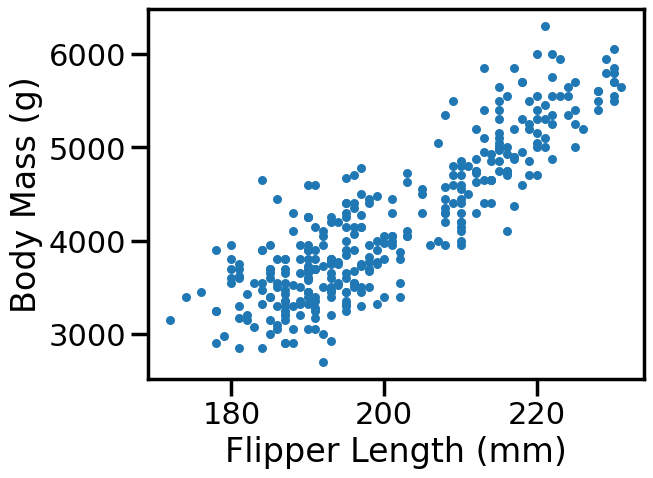

In [30]:
_ = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")

We observe that there is a reasonable linear relationship between the flipper length and the body mass. Here, our target to be predicted will be the body mass while the flipper length will be a feature.

In [31]:
X, y = data[["Flipper Length (mm)"]], data["Body Mass (g)"]

In the previous notebook, we used a <tt>LinearRegression</tt> from scikit-learn and show that we could learn the state of the model from the data when calling <tt>fit</tt> and use these states for prediction when calling the method <tt>predict</tt>.

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

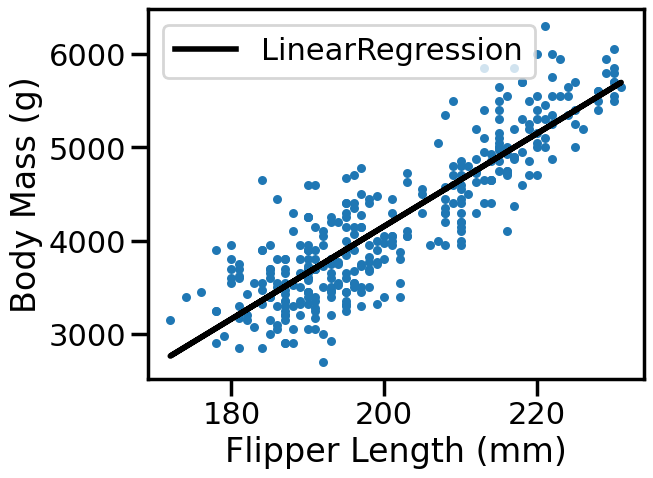

In [33]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred, label=model.__class__.__name__, color="black", linewidth=4)
_ = ax.legend()

In the previous notebook, we quickly mentioned that the linear regression model was minizing an error between the true target and the predicted target. This error is also known as loss function. The loss that is minimized in this case is known as the least squared error. This loss is defined as:

$$
loss = (y - \hat{y})^2
$$

that is

$$
loss = (y - X \beta)^2
$$

We can check what the loss look likes in practice:

In [34]:
def se_loss(y_true, y_pred):
    loss = (y_true - y_pred) ** 2
    return loss

In [35]:
import numpy as np

xmin, xmax = -2, 2
xx = np.linspace(xmin, xmax, 100)

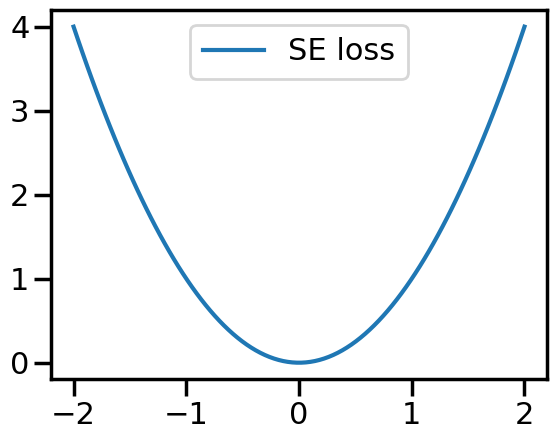

In [36]:
import matplotlib.pyplot as plt

plt.plot(xx, se_loss(0, xx), label="SE loss")
_ = plt.legend()

Looking at the shape of the loss function, we see that the bell shape of the loss will impact greatly the large error.
In practice, this will have an impact on the fit.

<div class="alert alert-success">
    <p><b>EXERCISE</b>:</p>
    <ul>
        <li>Create a new sample in the dataset that we will call an outlier. This penguin will have a flipper length of 230 mm and a body mass of 300 g.</li>
        <li>Plot the new dataset.</li>
        <li>Fit a <tt>LinearRegression</tt> model on this new dataset. When calling <tt>fit</tt> pass a <tt>sample_weight</tt> provide 10x more weight to the last sample (outlier) than on other samples.</li>
        <li>Plot the predictions given by this model.</li>
    </ul>
    What is the effect of having an outlier in the dataset?
</div>

In [37]:
# my solution

# Create a new sample in the dataset that we will call an outlier. This penguin will have a flipper length of
# 230 mm and a body mass of 300 g.

data = pd.concat([data, pd.Series({'Flipper Length (mm)':230, 'Body Mass (g)': 300}).to_frame().T], ignore_index=True)

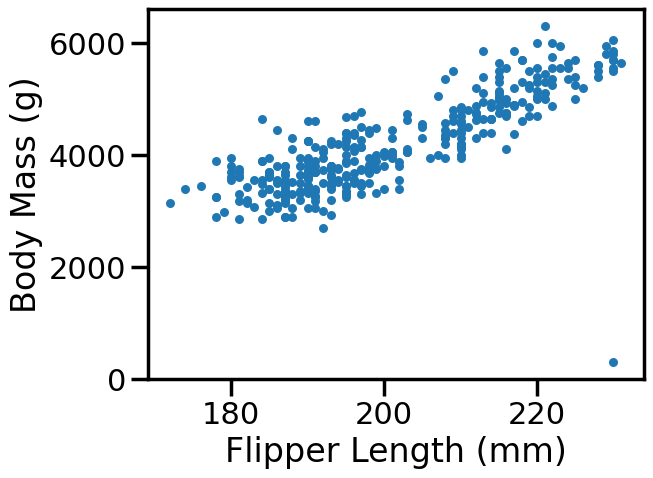

In [38]:
# my solution

# Plot the new dataset.

_ = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")

In [39]:
# my solution

# Fit a LinearRegression model on this new dataset. When calling fit pass a
# sample_weight provide 10x more weight to the last sample (outlier) than on other
# samples.

from sklearn.model_selection import train_test_split

X, y = data[["Flipper Length (mm)"]], data["Body Mass (g)"]

# in this task, we cannot do a train test split, because we need control over having the
# outlier data point in the training set:

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sample_weight = np.ones(shape=(X.shape[0],))
sample_weight[-1] = 10

model = LinearRegression()
model.fit(X=X, y=y, sample_weight= sample_weight)

LinearRegression()

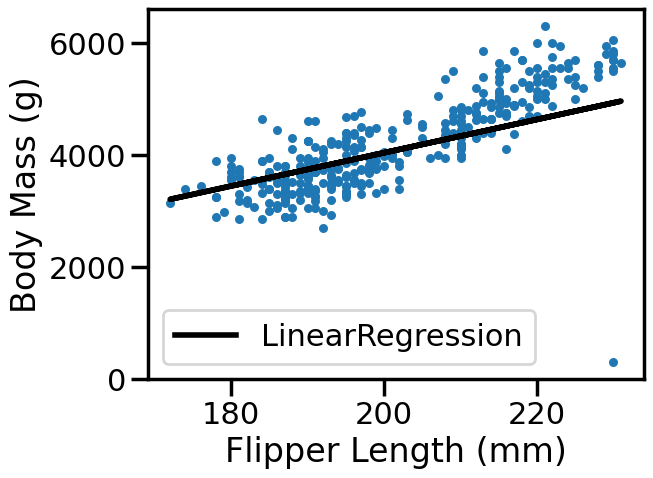

In [40]:
# my solution

# Plot the predictions given by this model.

y_pred = model.predict(X)

ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred, label=model.__class__.__name__, color="black", linewidth=4)
_ = ax.legend()

In [41]:
# my solution

# What is the effect of having an outlier in the dataset?

# The predictions are heavily influenced by the outlier, especially since its weight is
# evaluated 10 times for calculating the loss.

In [42]:
se_loss(y, y_pred)

0      7.581943e+04
1      3.125658e+04
2      4.103799e+05
3      1.453027e+05
4      8.473399e+03
           ...     
338    4.880283e+05
339    3.156850e+03
340    5.582964e+04
341    4.192004e+04
342    2.144167e+07
Name: Body Mass (g), Length: 343, dtype: float64

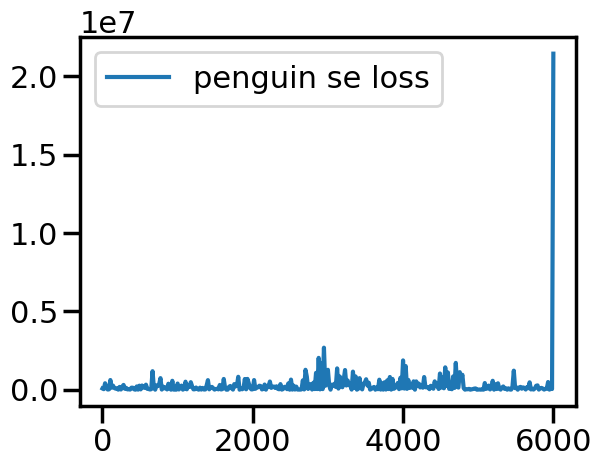

In [43]:
# my solution

# experiment: shape of the actual loss with the true values `y`

xmin, xmax = 0, 6000
xx = np.linspace(xmin, xmax, y.shape[0])

plt.plot(xx, se_loss(y, y_pred), label="penguin se loss")
_ = plt.legend()

# we can see the outlier's loss to the right

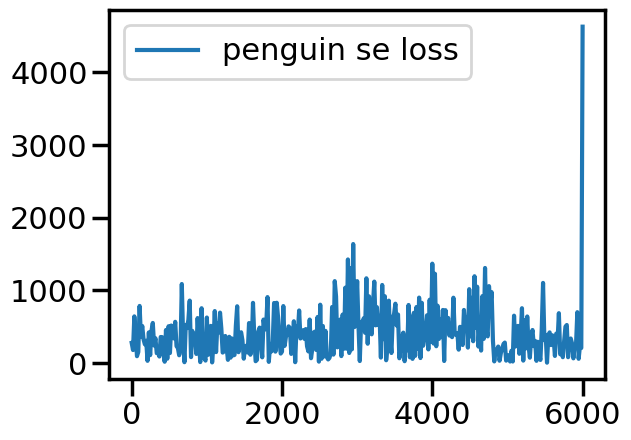

In [ ]:

# experiment: plot absolute loss
plt.plot(xx, absolute_loss(y, y_pred), label="penguin se loss")
_ = plt.legend()

Instead of using the squared loss, we will use a loss known as the Huber loss. In this regard, we will use the `HuberRegressor` model available in scikit-learn. We will fit this model in the exact similar way that we previously did.

In [45]:
from sklearn.linear_model import HuberRegressor

model = HuberRegressor()
model.fit(X, y, sample_weight=sample_weight)
y_pred = model.predict(X)

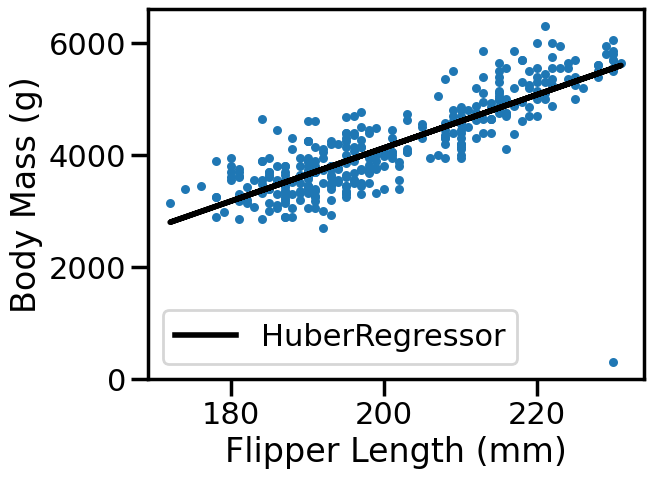

In [46]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred, label=model.__class__.__name__, color="black", linewidth=4)
_ = ax.legend()

We observe that the outlier has much less weight than in the case of the least squared loss.

<div class="alert alert-success">
    <p><b>EXERCISE</b>:</p>
    <ul>
        <li>Look at the documentation of the <tt>HuberRegressor</tt>.</li>
        <li>Similarly to the loss function <tt>se_loss</tt>, define a function <tt>huber_loss</tt> to depict the shape of the loss.</li>
        <li>Reproduce the same for the absolute loss.</li>
    </ul>
    Why outliers have less impact on the fit of an Huber regressor than an ordinary least square.
</div>

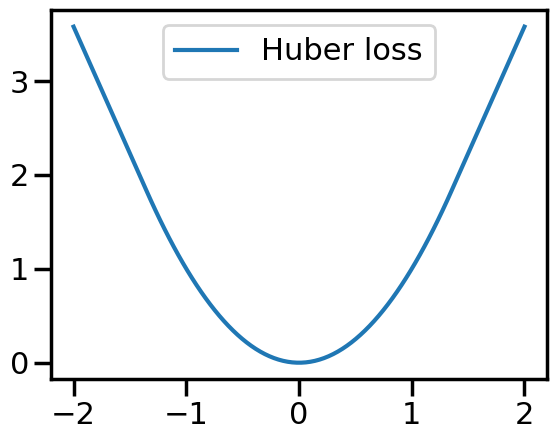

In [47]:
# my solution

# Similarly to the loss function `se_loss`, define a function `huber_loss` to depict the shape of the loss.


# first attempt based on https://scikit-learn.org/dev/modules/linear_model.html#huber-regression, which had
# wrongly suggested, the whole function to minimize was the loss, which had confused me;
# made PR 30417 to fix that: https://github.com/scikit-learn/scikit-learn/pull/30417

epsilon=1.35
alpha=0.0001

def huber_loss(y_true, y_pred, epsilon, alpha):

    if abs((y_pred - y_true)/something.std()) < epsilon:    # <-- there is a mistake because y_pred and y_true 
        large_h = ((y_pred - y_true)/something.std()) ** 2  # are both arrays!
    else:
        large_h = 2 * epsilon * abs((y_pred - y_true)/something.std()) - epsilon ** 2

    loss = something.std() + large_h * something.std() + alpha * np.square(w.T @ w) ** 2
    
    return loss

    # it fails, because I couldn't figure out what the standard deviation is taken from nor how I can isolate
    # `w` from y_pred and after a few hours I gave up to continue a different way; update: a few days later I
    # know that sigma is not for standard deviation but a parameter as well used for scaling





# second attempt based on a mixture of information from https://en.wikipedia.org/wiki/Huber_loss and the
# scikit-learn docs:
def huber_loss(y_true, y_pred, epsilon):

    #if abs((y_pred - y_true)) < epsilon:       # <-- fails with "truth value ambiguous"
    #    huber_loss = ((y_pred - y_true)) ** 2
    #else:
    #    huber_loss = 2 * epsilon * abs((y_pred - y_true)) - epsilon ** 2

    huber_loss = []
    for v_1, v_2 in zip(y_pred, y_true):       # <-- needs to be vectorized, but I cannot yet figure out how
        if abs((v_1 - v_2)) < epsilon:
            huber_loss.append(((v_1 - v_2)) ** 2)
        else:
            huber_loss.append(2 * epsilon * abs((v_1 - v_2)) - epsilon ** 2)
    
    return huber_loss

    # in the Wikipedia definition, the huber loss is only the part before the regularization and it is also
    # not scaled by nor do we add a standard deviation to it. I'm unaware what effect the scaling by standard
    # deviation (still: std of what?) has and I am not sure if what I did is correct. Should I also have added
    # the regularisation?

    # this works, but its slow because it loops!






# third attempt involving vectorization: boolean indexing
def huber_loss(y_true, y_pred, epsilon):

    loss_starting_point = np.ones_like(y_pred) # init a loss that has the same shape as y_pred
    epsilon_indicator = abs(y_pred - y_true) < epsilon # indicator to select entries to replace

    # for certain values do this, for the other values do that:
    loss_starting_point[epsilon_indicator] = ((y_pred[epsilon_indicator] - y_true[epsilon_indicator])) ** 2
    loss_starting_point[~epsilon_indicator] = 2 * epsilon * \
        abs((y_pred[~epsilon_indicator] - y_true[~epsilon_indicator])) - epsilon ** 2
    loss = loss_starting_point
    
    return loss

    # this works and is much faster





# forth attempt involving vectorization: np.where()
def huber_loss(y_true, y_pred, epsilon):

    epsilon_indicator = abs(y_pred - y_true) < epsilon # indicator to select entries to replace

    loss = np.where(epsilon_indicator, 
                    (y_pred - y_true) ** 2,
                    2 * epsilon * abs(y_pred - y_true) - epsilon ** 2
    )
    
    return loss

# I like this version best, because of readability




length = 100
xmin, xmax = -2, 2
xx = np.linspace(xmin, xmax, length)

plt.plot(xx, huber_loss(np.zeros(shape=(length,)), xx, epsilon), label="Huber loss")
_ = plt.legend()

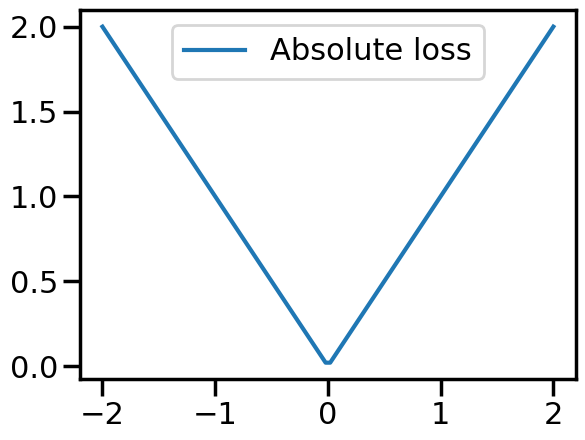

In [48]:
# my solution

# Reproduce the same for the absolute loss.

def absolute_loss(y_true, y_pred):

    loss = abs(y_true - y_pred)

    return loss

xmin, xmax = -2, 2
xx = np.linspace(xmin, xmax, 100)

plt.plot(xx, absolute_loss(0, xx), label="Absolute loss")
_ = plt.legend()

In [49]:
# my solution

# Why outliers have less impact on the fit of an Huber regressor than an ordinary least square.

# 1. The HuberRegressor uses regularization. B
# 2. It penalizes big differences between `y_true` and `y_pred` less than the squared error loss, because
#    outside of the distance `epsilon`, it almost behaves like the absolute error.
# 
# See the below graph in Wikipedia, that show that for larger differences, the huber loss (green) raises less
# steep than the squared loss (blue):

![Wikimedia Commons](https://upload.wikimedia.org/wikipedia/commons/c/cc/Huber_loss.svg)

We observe that the Huber and absolute losses are penalizing less outliers. It means that these outliers will be less attractive and we will not try to find $\beta$ that try to minimize this large error. Indeed, the <tt>HuberRegressor</tt> will give an estimator of the median instead of the mean.

If one is interesting in other quantile than the median, scikit-learn provides an estimator called `QuantileRegressor` that minimizes the pinball loss and provide a estimator of the requested quantile. For instance, one could request the median in the following manner:

In [50]:
from sklearn.linear_model import QuantileRegressor

model = QuantileRegressor(quantile=0.5)
model.fit(X, y, sample_weight=sample_weight)
y_pred = model.predict(X)

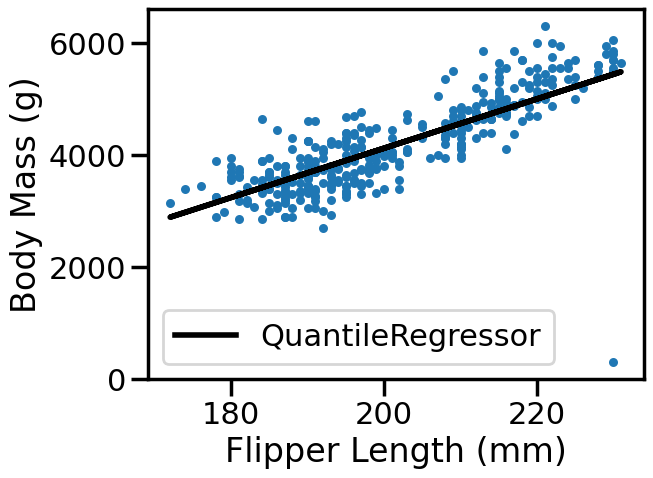

In [51]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred, label=model.__class__.__name__, color="black", linewidth=4)
_ = ax.legend()

The advantage of this estimator is that one can estimate some confidence interval.

In [52]:
model = QuantileRegressor(quantile=0.5, solver="highs")
model.fit(X, y, sample_weight=sample_weight)
y_pred_median = model.predict(X)

model.set_params(quantile=0.90)
model.fit(X, y, sample_weight=sample_weight)
y_pred_90 = model.predict(X)

model.set_params(quantile=0.10)
model.fit(X, y, sample_weight=sample_weight)
y_pred_10 = model.predict(X)

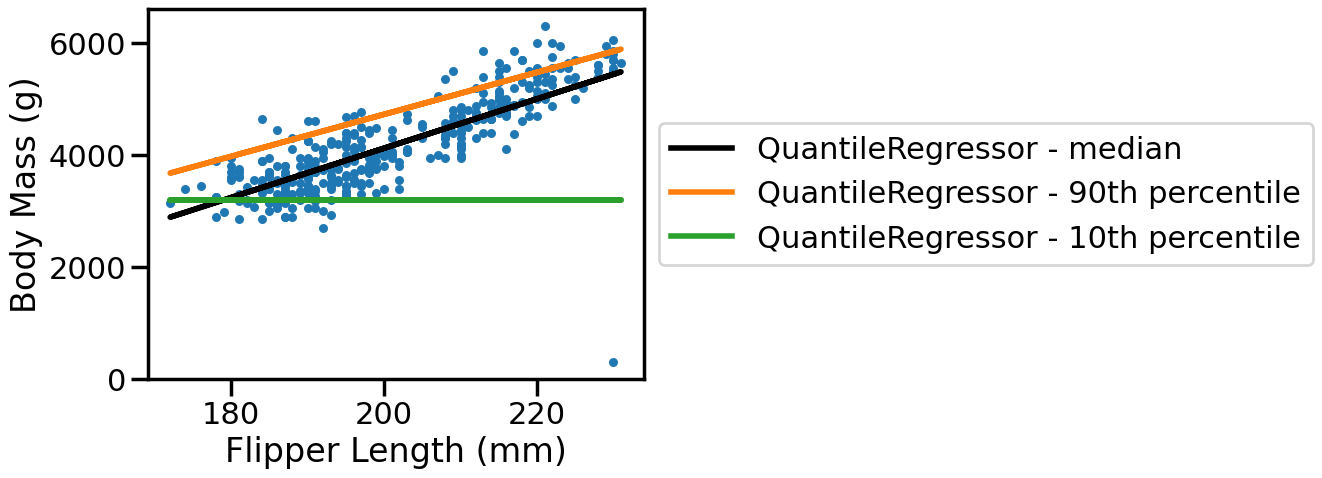

In [53]:
ax = data.plot.scatter(x="Flipper Length (mm)", y="Body Mass (g)")
ax.plot(X, y_pred_median, label=f"{model.__class__.__name__} - median", color="black", linewidth=4)
ax.plot(X, y_pred_90, label=f"{model.__class__.__name__} - 90th percentile", color="tab:orange", linewidth=4)
ax.plot(X, y_pred_10, label=f"{model.__class__.__name__} - 10th percentile", color="tab:green", linewidth=4)
_ = ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

Here, we provide a 80% confidence interval around the median by fitting the 10th and 90th percentiles of the dataset.